In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget

from importlib import reload

import sys
sys.path.append('../')
from demo import resample
from general_purpose import uplotlib as uplt

In [8]:
reload(resample)

<module 'demo.resample' from '/media/alessandro/OS/Users/ale57/Documents/0. Lyon/WORK/REA-Veros/tests/../demo/resample.py'>

In [23]:
N = 20
weights = np.ones(N)
weights[::2]*=2
weights[::3]*=3
weights[::5]*=5
weights = weights/np.sum(weights)

rv_survivors = []
c_survivors = []

for i in range(1000):
    rv_survivors.append(resample.draw(weights, method='reduced_variance'))
    c_survivors.append(resample.draw(weights, method='choice'))

In [24]:
rv_hists = np.array([np.histogram(s, bins=np.linspace(0,N,N + 1)-0.5)[0] for s in rv_survivors])
c_hists = np.array([np.histogram(s, bins=np.linspace(0,N,N + 1)-0.5)[0] for s in c_survivors])

In [25]:
mean = np.mean(rv_hists,axis=0)
std = np.std(rv_hists, axis=0)

rv_res = uplt.ufloatify(mean,std)

mean = np.mean(c_hists,axis=0)
std = np.std(c_hists, axis=0)

c_res = uplt.ufloatify(mean,std)

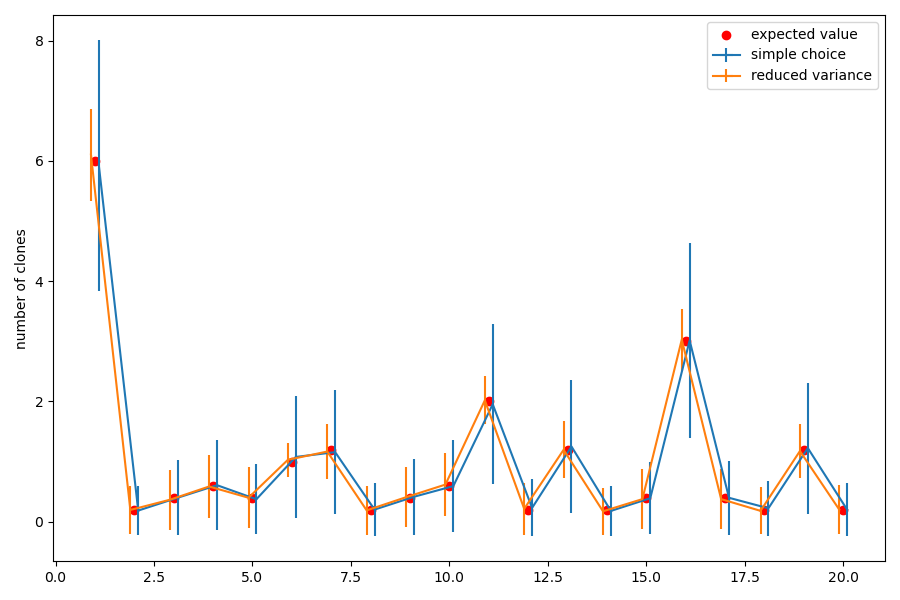

In [27]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.scatter(1 + np.arange(N), weights*N, color='red', label='expected value')
uplt.plot(1 + np.arange(N)+0.1, c_res, label='simple choice')
uplt.plot(1 + np.arange(N)-0.1, rv_res, label='reduced variance')

plt.ylabel('number of clones')
plt.legend()

fig.tight_layout()

In [52]:
logging.debug('ha')

DEBUG:root:ha


In [53]:
resample.logger.debug('ha')

In [51]:
resample.logger.setLevel(20)